In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV


In [11]:
U_c = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/results/CCA/6d/U_c_linear.npy')
U_c = U_c.reshape(K, T, d)
U_c.shape

(108, 35, 6)

/var/folders/rc/1hy0j2s15dn18v_vb39s2dph0000gn/T/ipykernel_79017/1505838502.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/rc/1hy0j2s15dn18v_vb39s2dph0000gn/T/ipykernel_79017/1505838502.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/rc/1hy0j2s15dn18v_vb39s2dph0000gn/T/ipykernel_79017/1505838502.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)


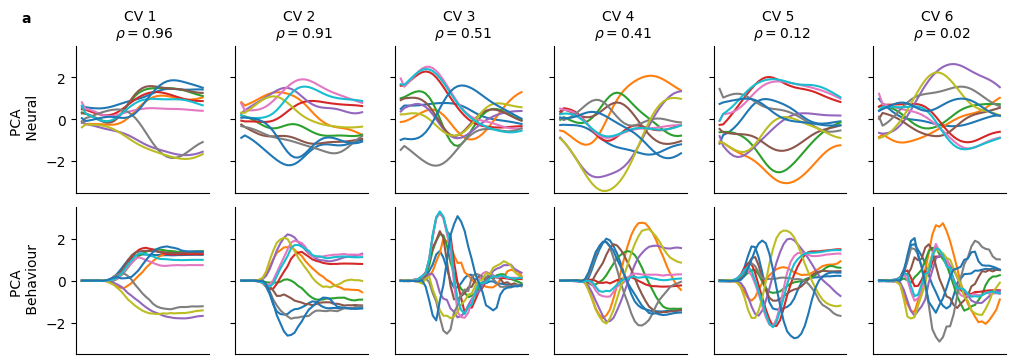

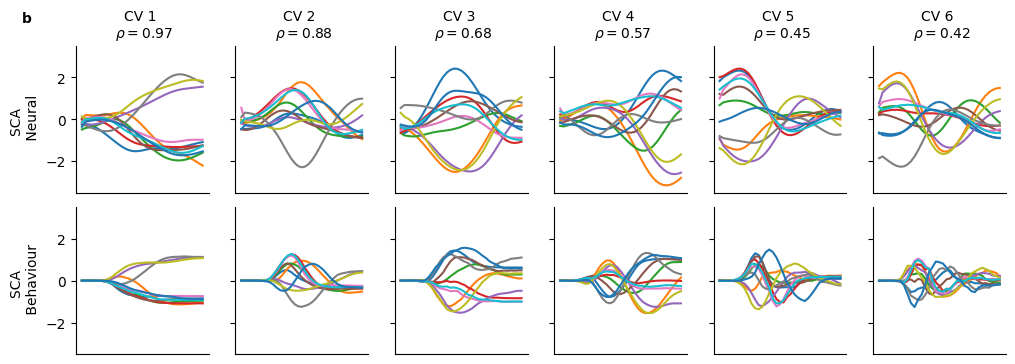

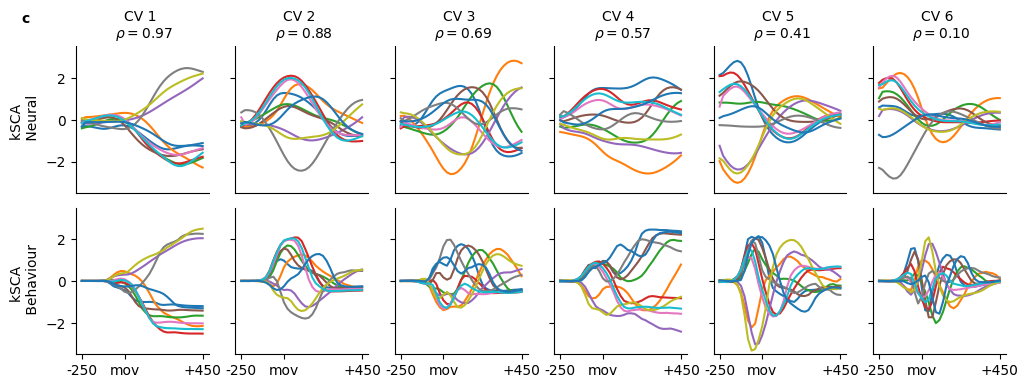

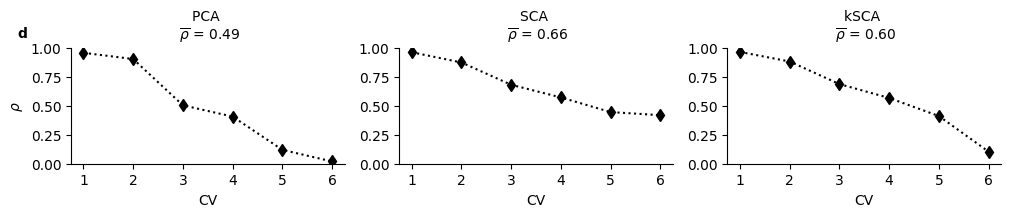

In [25]:
types = ['pca', 'linear', 'gaussian']

K = 108
T = 35
d = 6

def get_CCA_plots(U_c, V_c, method, id_sbplt, fontsize, x_lbl=False):
    fig, axs = plt.subplots(2,6, figsize=(12,4))

    U_c = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/results/CCA/6d/{U_c}.npy')
    V_c = np.load(f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/results/CCA/6d/{V_c}.npy')
    corrs = [np.corrcoef(U_c[:, i], V_c[:, i])[0, 1] for i in range(d)]  
    U_c = U_c.reshape(K, T, d)
    V_c = V_c.reshape(K, T, d)


    step = 10
    ids = np.arange(0,108,step)
    n_cond = len( ids )

    times = np.arange(-250, 450, 20).tolist()   
    total_range = 450 + 250  
    step = total_range / (len(times) - 1)  # Step size between each index
    indices = np.round((np.array([-250, 0, 450]) + 250) / step).astype(int)
    for j in range(d): 
        for i in range(n_cond):
            id = ids[i]
            axs[0, j].plot(U_c[id,:,j])
            axs[1, j].plot(V_c[id,:,j])

            #axs[1, j].set_xlabel('Time')
            axs[0, j].set_title(f'CV {j+1} \n $\\rho = {corrs[j]:.2f}$', fontsize=fontsize)

    for row in range(axs.shape[0]):  # Loop over the rows
        for col, ax in enumerate(axs[row]):
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.set_ylim([-3.5, 3.5]) 
            ax.tick_params(axis='both', which='major', labelsize=fontsize)
            ax.set_xticklabels([])
            ax.set_xticks([])
      
            if col != 0:
                ax.set_yticklabels([])
                #ax.set_yticks([])

            if x_lbl == True and row == 1:
                ax.set_xticks(indices)
                ax.set_xticklabels(['-250', 'mov', '+450'])

    axs[0, 0].set_ylabel(f'{method} \n Neural', fontsize=fontsize)
    axs[1, 0].set_ylabel(f'{method} \n Behaviour', fontsize=fontsize)
    fig.text(0.08, 0.95, id_sbplt, va='center', rotation='horizontal', fontsize=fontsize, fontweight='bold')
    plt.subplots_adjust(wspace=0.2, hspace=0.1)

def get_CCA_plots2(U_c_list, V_c_list,method, fontsize):
    fig, axs = plt.subplots(1,3, figsize=(12,1.5))
    for i, (U_c, V_c) in enumerate(zip(U_c_list, V_c_list)):
        U_c = np.load(U_c)
        V_c = np.load(V_c)
        corrs = [np.corrcoef(U_c[:, i], V_c[:, i])[0, 1] for i in range(d)]    
        axs[i].plot(corrs, marker='d', linestyle=':', color='black' )
        axs[i].set_xlabel('CV')
        axs[i].set_ylim([0, 1]) 
        axs[i].set_title(f'{method[i]} \n $\\overline{{\\rho}}$ = {np.mean(corrs):.2f}', fontsize=fontsize)
    axs[0].set_ylabel('$\\rho$')

    ds = np.arange(1,7)
    for i, ax in enumerate(axs):
        ax.spines[['right', 'top']].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
        ax.set_xticks(np.arange(len(ds)), ds)
        #if i != 0:
            #ax.set_yticklabels([])
            #ax.set_yticks([])
    fig.text(0.08, 0.98, 'd', va='center', rotation='horizontal', fontsize=fontsize, fontweight='bold')
    plt.subplots_adjust(wspace=0.2)
   
fontsize=10
get_CCA_plots('U_c_pca', 'V_c_pca', method='PCA', id_sbplt='a', fontsize=fontsize)
get_CCA_plots('U_c_linear', 'V_c_linear', method='SCA', id_sbplt='b', fontsize=fontsize)
get_CCA_plots('U_c_gaussian', 'V_c_gaussian', method='kSCA', id_sbplt='c', fontsize=fontsize, x_lbl=True)

method = ['PCA', 'SCA', 'kSCA']
path = f'/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_3_7_2024/results/CCA/6d'
U_c_list = [f'{path}/U_c_pca.npy', f'{path}/U_c_linear.npy', f'{path}/U_c_gaussian.npy']
V_c_list = [f'{path}/V_c_pca.npy', f'{path}/V_c_linear.npy', f'{path}/V_c_gaussian.npy']
get_CCA_plots2(U_c_list, V_c_list, method, fontsize=fontsize)